In [1]:
root = "/Users/carsonc/Box/scrna/"

"/Users/carsonc/Box/scrna/"

In [2]:
datafolder = "/Users/carsonc/Dropbox/scrna/data/HCT116_all_cells_histograms_and_half_lives_March_2021/T120_JQ1"

"/Users/carsonc/Dropbox/scrna/data/HCT116_all_cells_histograms_and_half_lives_March_2021/T120_JQ1"

In [3]:
folder = "2021-03-09-JQ1"

"2021-03-09-JQ1"

In [4]:
using PyPlot
using StatsKit
using DelimitedFiles
using CSV

┌ Info: Precompiling StatsKit [2cb19f9e-ec4d-5c53-8573-a4542a68d3f0]
└ @ Base loading.jl:1260


In [ ]:
include("/Users/carsonc/github/StochasticGene/src/StochasticGene.jl")

In [93]:
m=StochasticGene.readmean(joinpath("/Users/carsonc/Box/scrna/Results/$folder","param_stats_scRNA_T120_JQ1_ss_JQ1_RPL3_3_2.txt"))

2×6 Array{Any,2}:
 0.0235116    0.12874     0.310993    0.00938145   2.47739   0.159037
 0.000420117  0.00202738  0.00311837  0.000169122  0.048308  0.00269994

In [97]:
reshape(m,length(m),1)

12×1 Array{Any,2}:
 0.023511614232337517
 0.0004201174938642844
 0.12873970762109263
 0.002027377797059528
 0.3109933905445943
 0.0031183697709602086
 0.00938145083718593
 0.00016912200628651982
 2.4773854700561166
 0.048308007084152775
 0.15903715671220592
 0.002699936834854926

In [9]:
include("makeswarm.jl")

checkgenes (generic function with 2 methods)

In [6]:
include("scriptfunctions.jl")

true

In [124]:
makeswarm(3,"fit_JQ1_3","T120_JQ1",4.,5.,["DMSO","JQ1"],"2021-03-16","fitscript.jl")

1281
1231
50
1047


In [13]:
StochasticGene.assemble_all("/Users/carsonc/Box/scrna/Results/$folder",["scRNA_T120_JQ1_ss"],["DMSO","JQ1"],["3"],".csv",true)

In [16]:
StochasticGene.assemble_rates("/Users/carsonc/Box/scrna/Results/$folder","scRNA_T0_ss","DMSO","2",".csv",false)

In [60]:
r_T120_D_3 = StochasticGene.readdlm("/Users/carsonc/Box/scrna/Results/$folder/rates_scRNA_T120_JQ1_ss_DMSO_3.csv",',');
r_T120_J_3 = StochasticGene.readdlm("/Users/carsonc/Box/scrna/Results/$folder/rates_scRNA_T120_JQ1_ss_JQ1_3.csv",',');
p_T120_J_3=StochasticGene.residenceprob_G("/Users/carsonc/Box/scrna/Results/$folder/rates_scRNA_T120_JQ1_ss_JQ1_3.csv",3);
p_T120_D_3=StochasticGene.residenceprob_G("/Users/carsonc/Box/scrna/Results/$folder/rates_scRNA_T120_JQ1_ss_DMSO_3.csv",3);

In [77]:
p_T120_J_3

5523×4 Array{Any,2}:
 "AATK"         0.869438  0.122617    0.00794579
 "ABHD17B"      0.822863  0.139858    0.0372794
 "ADM"          0.867343  0.112021    0.0206362
 "ADRB1"        0.996132  0.00255783  0.00131051
 "AEN"          0.813162  0.14715     0.0396876
 "AHDC1"        0.872201  0.10114     0.0266589
 "AK5"          0.99785   0.00159676  0.000553091
 "AMOTL2"       0.843546  0.0912154   0.0652381
 "ANGPT2"       0.883658  0.106566    0.00977669
 "ANGPTL4"      0.936453  0.0535254   0.0100218
 "ANKRD37"      0.954964  0.0401199   0.00491559
 "ANKRD49"      0.897122  0.0795886   0.0232893
 "APOA1"        0.994766  0.00319175  0.00204195
 ⋮                                    
 "ZNF384"       0.95767   0.0330587   0.00927143
 "ZNF503-AS1"   0.963025  0.0328025   0.00417273
 "ZNF598"       0.927176  0.0606313   0.0121923
 "ZNF688"       0.937603  0.0562143   0.00618282
 "ZNF700"       0.977802  0.0187238   0.00347445
 "ZNF714"       0.958887  0.0271416   0.0139711
 "ZNF720"       0

In [60]:
setdiff(r_T120_D_3[:,1],r_T120_J_3[:,1])

0-element Array{Any,1}

In [62]:
measures_T120_D_3 = StochasticGene.readdlm("/Users/carsonc/Box/scrna/Results/$folder/measures_scRNA_T120_JQ1_ss_DMSO_3.csv",',',header=false);
measures_T120_A_3 = StochasticGene.readdlm("/Users/carsonc/Box/scrna/Results/$folder/measures_scRNA_T120_JQ1_ss_JQ1_3.csv",',',header=false);

In [65]:
t,h1,h2 = StochasticGene.stats_rna(p_T120_D_3[:,1],["DMSO","JQ1"],datafolder);

In [66]:
prod(isfinite.(t))
inds=findall(isfinite.(t));

In [67]:
data_p120_3 = DataFrame(Gene = p_T120_D_3[inds,1],Expression=t[inds],Mean1=h1[inds],Mean2=h2[inds], DeltaG1=log.(p_T120_D_3[inds,2])-log.(p_T120_J_3[inds,2]), DeltaG2=log.(p_T120_D_3[inds,3])-log.(p_T120_J_3[inds,3]), DeltaG3=log.(p_T120_D_3[inds,4])-log.(p_T120_J_3[inds,4]));

In [68]:
data_p120_3 = data_p120_3;
hl = "JQ1";

In [187]:
CSV.write("rates$(hl).csv",data_r120_3);
CSV.write("occupancy$(hl).csv",data_p120_3);

In [69]:
ols3 = lm(@formula(DeltaG3 ~ Expression), data_p120_3)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Array{Float64,1}},GLM.DensePredChol{Float64,LinearAlgebra.CholeskyPivoted{Float64,Array{Float64,2}}}},Array{Float64,2}}

DeltaG3 ~ 1 + Expression

Coefficients:
─────────────────────────────────────────────────────────────────────────
                 Coef.  Std. Error      t  Pr(>|t|)  Lower 95%  Upper 95%
─────────────────────────────────────────────────────────────────────────
(Intercept)  0.0636551   0.0204017   3.12    0.0019  0.0235717   0.103738
Expression   0.803176    0.0290887  27.61    <1e-99  0.746025    0.860327
─────────────────────────────────────────────────────────────────────────

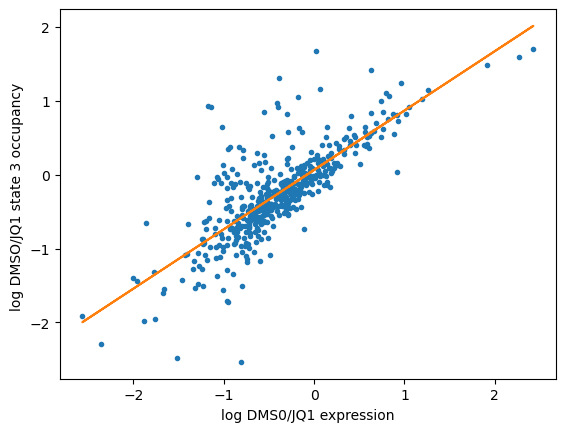

In [70]:
plot(data_p120_3.Expression,data_p120_3.DeltaG3,".")
plot(data_p120_3.Expression,MultivariateStats.predict(ols3))
ylabel("log DMSO/JQ1 state 3 occupancy ")
xlabel("log DMS0/JQ1 expression")
savefig(hl * "_G3")

In [71]:
ols2 = lm(@formula(DeltaG2 ~ Expression), data_p120_3)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Array{Float64,1}},GLM.DensePredChol{Float64,LinearAlgebra.CholeskyPivoted{Float64,Array{Float64,2}}}},Array{Float64,2}}

DeltaG2 ~ 1 + Expression

Coefficients:
───────────────────────────────────────────────────────────────────────
                Coef.  Std. Error     t  Pr(>|t|)  Lower 95%  Upper 95%
───────────────────────────────────────────────────────────────────────
(Intercept)  0.146726   0.0691574  2.12    0.0344  0.0108514   0.2826
Expression   0.673667   0.0986048  6.83    <1e-10  0.479938    0.867397
───────────────────────────────────────────────────────────────────────

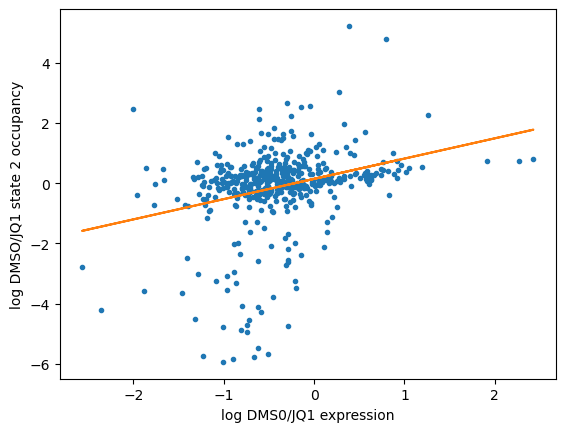

In [72]:
plot(data_p120_3.Expression,data_p120_3.DeltaG2,".")
plot(data_p120_3.Expression,MultivariateStats.predict(ols2))
ylabel("log DMSO/JQ1 state 2 occupancy")
xlabel("log DMS0/JQ1 expression")
savefig(hl * "_G2")

In [73]:
ols1 = lm(@formula(DeltaG1 ~ Expression), data_p120_3)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Array{Float64,1}},GLM.DensePredChol{Float64,LinearAlgebra.CholeskyPivoted{Float64,Array{Float64,2}}}},Array{Float64,2}}

DeltaG1 ~ 1 + Expression

Coefficients:
────────────────────────────────────────────────────────────────────────
                 Coef.  Std. Error     t  Pr(>|t|)  Lower 95%  Upper 95%
────────────────────────────────────────────────────────────────────────
(Intercept)  0.377795     0.35127   1.08    0.2827  -0.312349    1.06794
Expression   0.0408047    0.500842  0.08    0.9351  -0.943205    1.02481
────────────────────────────────────────────────────────────────────────

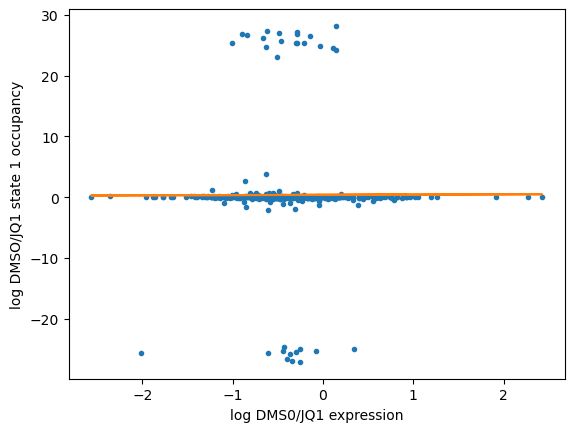

In [74]:
plot(data_p120_3.Expression,data_p120_3.DeltaG1,".")
plot(data_p120_3.Expression,MultivariateStats.predict(ols1))
ylabel("log DMSO/JQ1 state 1 occupancy")
xlabel("log DMS0/JQ1 expression")
savefig(hl * "_G1")

In [44]:
data1 = DataFrame(Expression=data_p120_3.Expression[abs.(data_p120_3.DeltaG1) .< 10],DeltaG1=data_p120_3.DeltaG1[abs.(data_p120_3.DeltaG1) .< 10]);

In [45]:
ols1 = lm(@formula(DeltaG1 ~ Expression),data1[isfinite.(data1.Expression),:])

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Array{Float64,1}},GLM.DensePredChol{Float64,LinearAlgebra.CholeskyPivoted{Float64,Array{Float64,2}}}},Array{Float64,2}}

DeltaG1 ~ 1 + Expression

Coefficients:
──────────────────────────────────────────────────────────────────────────────
                   Coef.  Std. Error      t  Pr(>|t|)   Lower 95%    Upper 95%
──────────────────────────────────────────────────────────────────────────────
(Intercept)  -0.00827116  0.00273498  -3.02    0.0025  -0.0136328  -0.00290952
Expression   -0.0344138   0.00481811  -7.14    <1e-11  -0.0438592  -0.0249684
──────────────────────────────────────────────────────────────────────────────

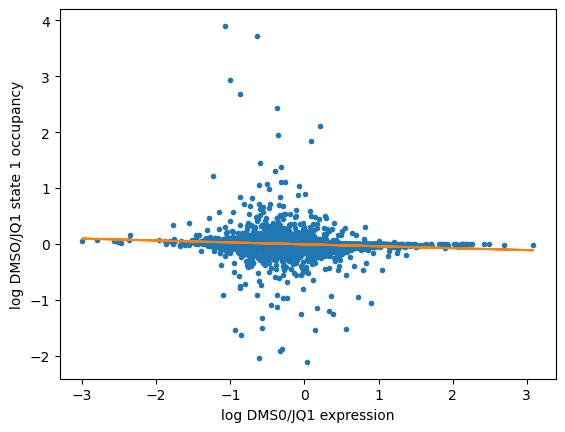

In [46]:
plot(data1.Expression,data1.DeltaG1,".")
plot(data1.Expression[isfinite.(data1.Expression)],MultivariateStats.predict(ols1))
ylabel("log DMSO/JQ1 state 1 occupancy")
xlabel("log DMS0/JQ1 expression")
savefig(hl * "_G1")

In [75]:
data_r120_3 = DataFrame(Gene = r_T120_D_3[:,1],Expression=t, DeltaR1=log.(r_T120_D_3[:,2])-log.(r_T120_J_3[:,2]), DeltaR2=log.(r_T120_D_3[:,3])-log.(r_T120_J_3[:,3]), DeltaR3=log.(r_T120_D_3[:,4])-log.(r_T120_J_3[:,4]), DeltaR4=log.(r_T120_D_3[:,5])-log.(r_T120_J_3[:,5]), DeltaR5=log.(r_T120_D_3[:,6])-log.(r_T120_J_3[:,6]), DeltaYield=log.(r_T120_D_3[:,8])-log.(r_T120_J_3[:,8]));

In [34]:
ols = lm(@formula(DeltaR5 ~ Expression), data_r120_3[inds,:])

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Array{Float64,1}},GLM.DensePredChol{Float64,LinearAlgebra.CholeskyPivoted{Float64,Array{Float64,2}}}},Array{Float64,2}}

DeltaR5 ~ 1 + Expression

Coefficients:
────────────────────────────────────────────────────────────────────────────
                  Coef.  Std. Error      t  Pr(>|t|)   Lower 95%   Upper 95%
────────────────────────────────────────────────────────────────────────────
(Intercept)  -0.0183323  0.00279017  -6.57    <1e-10  -0.0238021  -0.0128624
Expression    0.135118   0.00491708  27.48    <1e-99   0.125479    0.144758
────────────────────────────────────────────────────────────────────────────

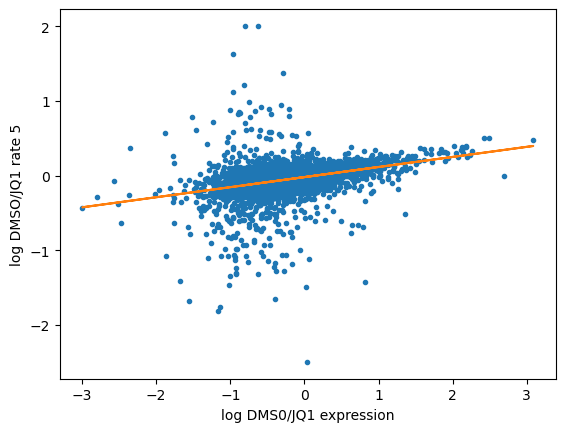

In [37]:
plot(data_r120_3.Expression,data_r120_3.DeltaR5,".")
plot(data_p120_3.Expression,MultivariateStats.predict(ols))
ylabel("log DMSO/JQ1 rate 5")
xlabel("log DMS0/JQ1 expression")
savefig(hl * "_R5")

In [263]:
CSV.write("rates$(hl).csv",data_r120_3)

"rates2h.csv"

In [264]:
CSV.write("occupancy$(hl).csv",data_p120_3)

"occupancy2h.csv"

In [132]:
StochasticGene.expression_rna("C15orf62",["DMSO","AUXIN"],"/Users/carsonc/Box/scrna/data/HCT116_all_cells_histograms_and_half_lives_March_2021/T120")

-7.51193401193401

In [42]:
data_r120_3 = DataFrame(Gene = r_T120_D_3[inds,1],Expression=t[inds], DeltaR1=log.(r_T120_D_3[inds,2])-log.(r_T120_A_3[inds,2]), DeltaR2=log.(r_T120_D_3[inds,3])-log.(r_T120_A_3[inds,3]), DeltaR3=log.(r_T120_D_3[inds,4])-log.(r_T120_A_3[inds,4]), DeltaR4=log.(r_T120_D_3[inds,5])-log.(r_T120_A_3[inds,5]), DeltaR5=log.(r_T120_D_3[inds,6])-log.(r_T120_A_3[inds,6]), DeltaYield=log.(r_T120_D_3[inds,8])-log.(r_T120_A_3[inds,8]),Decayrate =r_T120_D_3[inds,6],Deviance = measures_T120_A_3[inds,2] .+ measures_T120_D_3[inds,2]);

In [50]:
label = "rate"
olsR = lm(@formula(DeltaR1 ~ Expression), data_r120_3)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Array{Float64,1}},GLM.DensePredChol{Float64,LinearAlgebra.CholeskyPivoted{Float64,Array{Float64,2}}}},Array{Float64,2}}

DeltaR1 ~ 1 + Expression

Coefficients:
───────────────────────────────────────────────────────────────────
             Coef.  Std. Error    t  Pr(>|t|)  Lower 95%  Upper 95%
───────────────────────────────────────────────────────────────────
(Intercept)    0.0         NaN  NaN       NaN        NaN        NaN
Expression   NaN           NaN  NaN       NaN        NaN        NaN
───────────────────────────────────────────────────────────────────

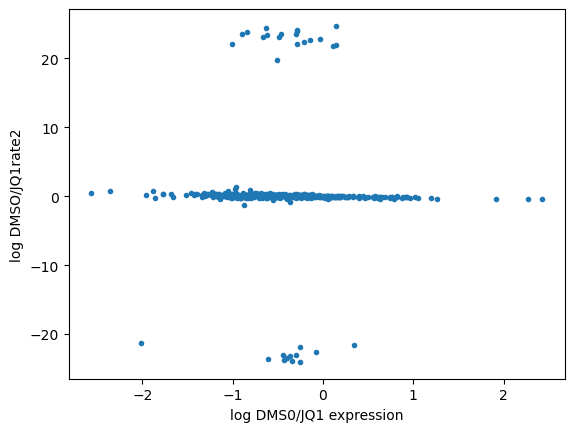

In [76]:
plot(data_r120_3.Expression,data_r120_3.DeltaR2,".")
ylabel("log DMSO/JQ1" * label * "2")
xlabel("log DMS0/JQ1 expression")
savefig(hl * "_" * label)

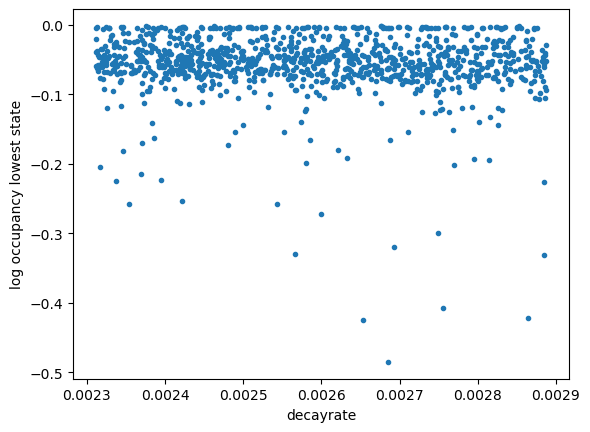

In [68]:
plot((r_T120_D_3[:,7]),log.(p_T120_D_3[:,2]),".")
ylabel("log occupancy lowest state")
xlabel("decayrate")
savefig("loweststate")